In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from aggregation import experiment
import numpy as np
from joblib import Parallel, delayed 

all_results = {}
for dgp in np.arange(1, 7):
    all_results[dgp] = Parallel(n_jobs=-1, verbose=3)(delayed(experiment)(500, dgp, it) for it in range(100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed: 26.5min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 26.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed: 25.1min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 25.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.


KeyboardInterrupt: 

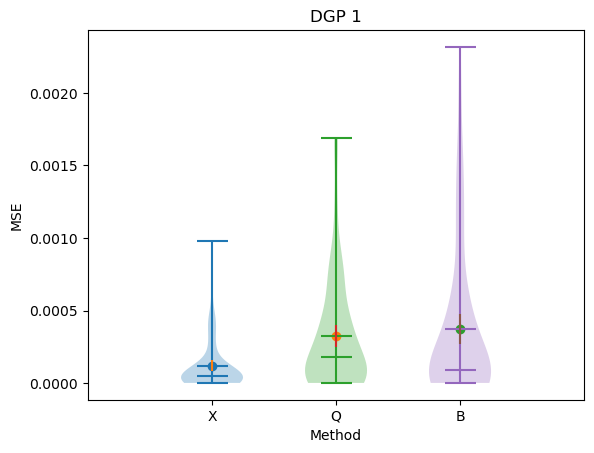

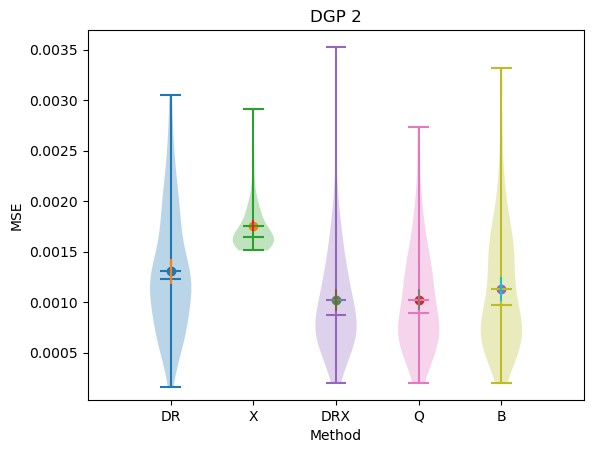

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

for dgp in np.arange(1, 3):
    results = all_results[dgp]
    mses, _ = results[0]
    names = list(mses.keys())
    mses_agg = {}
    mses_all = {}
    for name in names:
        mses = [r[0][name] for r in results]
        mses_all[name] = np.array(mses)
        mses_agg[name] = (np.mean(mses), np.std(mses), np.std(mses) / np.sqrt(len(results)))

    min_mse, _, _ = np.min(pd.DataFrame(mses_agg), axis=1)
    min_ind, _, _ = np.argmin(pd.DataFrame(mses_agg).values, axis=1)
    min_name = names[min_ind]
    min_mse_std = mses_agg[min_name][2]
    
    
    plt.show()
    it = 0
    for name, (mean, std, stderr) in mses_agg.items():
        if mean >= min_mse + 20*min_mse_std:
            continue
        plt.violinplot(mses_all[name], positions=[it], showmeans=True, showmedians=True, showextrema=True)
        plt.scatter(name, mean)
        plt.errorbar(name, mean, yerr=2*stderr)
        it += 1
    plt.title(f'DGP {dgp}')
    plt.xlabel('Method')
    plt.ylabel('MSE')
    plt.xlim([-1, it])
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

for name, mse in mses.items():
    plt.plot(cates['Ztest'], cates[name], '--', label=f'{name}: {mse:.4f}')
plt.xlabel('$Z$')
plt.ylabel('$Y$')
plt.legend()
plt.show()